## A Basic Notebook for Data Science
*by Jiazhen Zhu
March 2017*

## Steps Covered
1. Business Understanding
    *  Objective (What is the goal? What do you want to predict or estimate?)
    *  Description
2. Data Understanding
    *  Import libraries
    *  Load training and testing data  (How were the data sampled? Which data are relevant? Are there privacy issues?)
    *  Statistical summaries and visualisations (Explore data) (Plot the data. Are there anomalies? Are there patterns?)
    *  Data quality check
3. Data Preparation
    *  Clean data
        * Missing values imputation
    *  Construct required data
        * Feature Engineering
    *  Integrate data
4. Modeling
    *  Build the model (Build a model. Fit the model. Validate the model.)
5. Evaluation
    *  Model performance
    *  Feature importance
    *  The best model
6. Deployment
    *  Submit the result

[Adopted from Cross Industry Standard Process for Data Mining (CRISP-DM)](https://www.sv-europe.com/crisp-dm-methodology/)

## Goals we focus
There are seven major goals we need to focus during the analysis.

__Classifying__. We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

__Correlating__. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

__Converting__ For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

__Completing__. Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

__Correcting__. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

__Creating__. Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

__Charting__. How to select the right visualization plots and charts depending on nature of the data and the solution goals.

[Adopted from Titanic Data Science Solutions which is created by Manav Sehgal](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

# 1. Business Understanding
## 1.1 Objective
Predict survival on the Titanic

## 1.2 Description
[Description from Kaggle](https://www.kaggle.com/c/titanic)

# 2. Data Understanding
## 2.1 Import libraries

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Configure visualisations
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Modelling Helpers
from sklearn.preprocessing import   Normalizer , scale
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split , StratifiedKFold

from sklearn.feature_selection import RFECV

## 2.2 Load training and testing data

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
full = train_df.append(test_df , ignore_index=True)
print ('Datasets:' , 'full:' , full.shape , 'train_df:' , train_df.shape)

Datasets: full: (1309, 12) train_df: (891, 12)


## 2.3 Statistical summaries and visualisations (Explore data)

We will look at few row and overview for the data

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 2.3.1 The features what we have

In [7]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

There are total 12 features in our datasets. We will split them into categorical, quantitative data, and string data.. 

### 2.3.2 Categorical features
__Binary Variable__
1. Survived
2. Sex
3. Embarked

__Ordinal Variable__
1. Pclass

### 2.3.3 Quantitative features
__Continous Variable__
1. Age
2. Fare

__Discrete Variable__
1. SibSp
2. Parch

### 2.3.4 String features
1. Name
2. Ticket
3. Cabin

### 2.3.5 Some numeric key information

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.3.5 Some object key information

In [9]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hickman, Mr. Lewis",male,1601,G6,S
freq,1,577,7,4,644


### 2.3.6 The heatmap of correlation

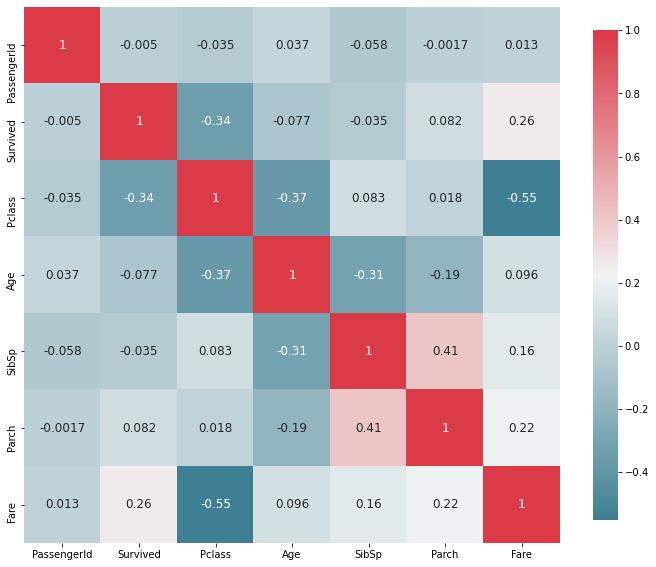

In [10]:
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize=(12, 10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    _ = sns.heatmap(
        corr, 
        cmap=cmap,
        square=True, 
        cbar_kws={'shrink': .9}, 
        ax=ax, 
        annot=True, 
        annot_kws={'fontsize': 12}
    )
plot_correlation_map(train_df)

### 2.3.7 Category or Discrete Variables

In [11]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid(df, row=row, col=col)
    facet.map(sns.barplot, cat, target)
    facet.add_legend()

__Pclass__

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


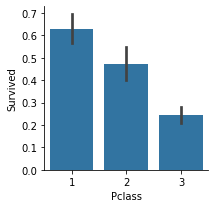

In [12]:
plot_categories(train_df, cat='Pclass', target='Survived')
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

__Sex__

,Sex,Survived
0,female,0.742038
1,male,0.188908


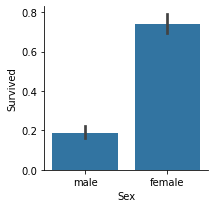

In [13]:
plot_categories(train_df, cat='Sex', target='Survived')
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

__SibSp__

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


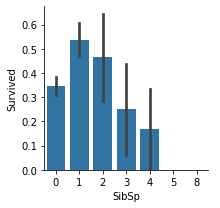

In [14]:
plot_categories(train_df, cat='SibSp', target='Survived')
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

__Parch__

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


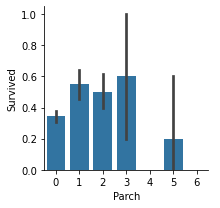

In [15]:
plot_categories(train_df, cat='Parch', target='Survived')
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

__Embarked__

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


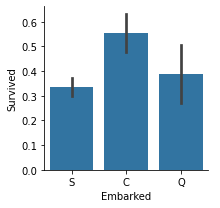

In [16]:
plot_categories(train_df, cat='Embarked', target='Survived')
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

## 2.4 Data quality check

### 2.4.1 Check Duplicate
Based on 2.3.5
There is not duplicate for Name, __high ratio__ of duplicates for __Ticket and Cabin__. __Low ratio__ of duplicates for __Embarked__.

### 2.4.2 check missing value

We have 177/891 = 19.9 missing ratio for __Age__, 687/891=77.1 missing ratio for __Cabin__. very low ratio for __Embarked__.


In [17]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2.4.2 check outiler

We don't have outliers. 

In [18]:
def outlier_calculate(col):
    c = 0.67448975019608171
    thresh = 3.5
    median = np.median(col)
    diff = np.abs(col - median)
    mad = np.median(diff)
    z_score = c * diff / mad
    return list(np.where(z_score > thresh)[0])

cols_check = train_df[['Age', 'SibSp', 'Parch', 'Fare']]
outlier_calculate(cols_check)

[]

## Assumtions

Based on what we have done before. We summary some assumtions based on seven goals. 

__Classifying__.

__Correlating__.

__Converting__.
1. Categorical variables need to be transformed to numeric variables


__Completing__. 
1. Age is the good feature, but has missing value. We need to complete it.
2. Embarked is the good feature, but has missing value. We need to complete it.
3. Cabin has high missing value. We need to complete it.

__Correcting__.
1. PassengerId don't have corr with survival. We need to drop it.


__Creating__.
1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to engineer the Name feature to extract Title as a new feature.
3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
4. We may also want to create a Fare range feature if it helps our analysis.
5. Extract information from Cabin.
6. Extract information from Ticket.

__Charting__. 

# 3. Data Preparation
## 3.1 Categorical variables need to be transformed to numeric variables
The variables Embarked, Pclass and Sex are treated as categorical variables. Some of our model algorithms can only handle numeric values and so we need to create a new variable (dummy variable) for every unique value of the categorical variables.

This variable will have a value 1 if the row has a particular value and a value 0 if not. Sex is a dichotomy (old school gender theory) and will be encoded as one binary variable (0 or 1).

In [19]:
# Transform Sex into binary values 0 and 1
sex = pd.Series( np.where(full.Sex == 'male' ,1 ,0 ), name = 'Sex')

In [20]:
# Create a new variable for every unique value of Embarked
embarked = pd.get_dummies( full.Embarked , prefix='Embarked' )
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [21]:
# Create a new variable for every unique value of Embarked
pclass = pd.get_dummies( full.Pclass , prefix='Pclass' )
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


## 3.2 Fill missing values in variables
Most machine learning alghorims require all variables to have values in order to use it for training the model. The simplest method is to fill missing values with the average of the variable across all observations in the training set.

In [22]:
# Create dataset
imputed = pd.DataFrame()

# Fill missing values of Age with the average of Age (mean)
imputed[ 'Age' ] = full.Age.fillna( full.Age.mean() )

# Fill missing values of Fare with the average of Fare (mean)
imputed[ 'Fare' ] = full.Fare.fillna( full.Fare.mean() )

imputed.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


## 3.3 Feature Engineering – Creating new variables


### 3.3.1 Extract titles from passenger names
Titles reflect social status and may predict survival probability

In [23]:
title = pd.DataFrame()
# we extract the title from each name
title[ 'Title' ] = full[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

# we map each title
title[ 'Title' ] = title.Title.map( Title_Dictionary )
title = pd.get_dummies( title.Title )
#title = pd.concat( [ title , titles_dummies ] , axis = 1 )

title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


### 3.3.2 Extract Cabin category information from the Cabin number

In [24]:
cabin = pd.DataFrame()

# replacing missing cabins with U (for Uknown)
cabin[ 'Cabin' ] = full.Cabin.fillna( 'U' )

# mapping each Cabin value with the cabin letter
cabin[ 'Cabin' ] = cabin[ 'Cabin' ].map( lambda c : c[0] )

# dummy encoding ...
cabin = pd.get_dummies( cabin['Cabin'] , prefix = 'Cabin' )

cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


### 3.3.3 Extract ticket class from ticket number

In [25]:
# a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
def cleanTicket( ticket ):
    ticket = ticket.replace( '.' , '' )
    ticket = ticket.replace( '/' , '' )
    ticket = ticket.split()
    ticket = map( lambda t : t.strip() , ticket )
    ticket = list(filter( lambda t : not t.isdigit() , ticket ))
    if len( ticket ) > 0:
        return ticket[0]
    else: 
        return 'XXX'

ticket = pd.DataFrame()

# Extracting dummy variables from tickets:
ticket[ 'Ticket' ] = full[ 'Ticket' ].map( cleanTicket )
ticket = pd.get_dummies( ticket[ 'Ticket' ] , prefix = 'Ticket' )

ticket.shape
ticket.head()

,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 3.3.4 Create family size and category for family size
The two variables Parch and SibSp are used to create the famiy size variable

In [26]:
family = pd.DataFrame()

# introducing a new feature : the size of families (including the passenger)
family[ 'FamilySize' ] = full[ 'Parch' ] + full[ 'SibSp' ] + 1

# introducing other features based on the family size
family[ 'Family_Single' ] = family[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
family[ 'Family_Small' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
family[ 'Family_Large' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

family.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


## 3.4 Assemble final datasets for modelling

### 3.4.1 Variable selection
Select which features/variables to inculde in the dataset from the list below:

imputed
embarked
pclass
sex
family
cabin
ticket

In [27]:
# Select which features/variables to include in the dataset from the list below:
# imputed , embarked , pclass , sex , family , cabin , ticket

full_X = pd.concat([sex, embarked, pclass, imputed, title, cabin , ticket, family], axis=1)

In [28]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [46]:
train = full_X.head(650)
test = full_X.iloc[650:891]
train0 = pd.read_csv('train.csv')
targets = train0['Survived'][:650]
targets_test = train0['Survived'][650:891]

In [47]:
# test0=pd.read_csv('test.csv')
# targets_test = test0['Survived']

In [44]:
len(targets)

891

In [67]:
train.to_csv("train_x.csv")
targets.to_csv("targets_y.csv")
test.to_csv("test_x.csv")
targets_test.to_csv("targets_test_y.csv")

__Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features.__

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [49]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

<AxesSubplot:ylabel='feature'>

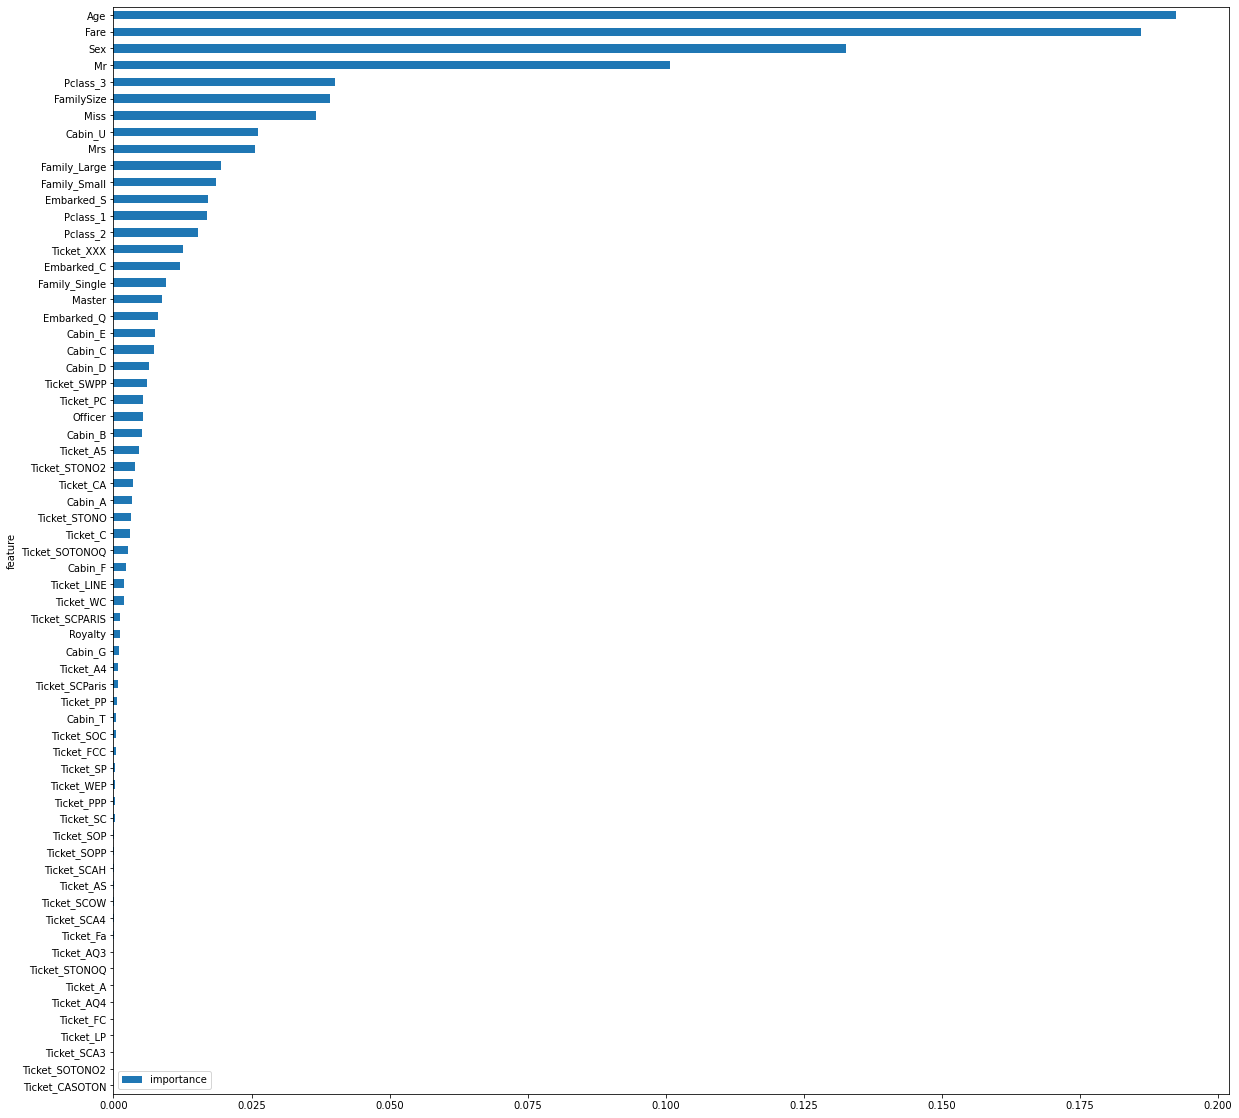

In [50]:
features.plot(kind='barh', figsize=(20, 20))

In [51]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(650, 13)

In [52]:
test_reduced = model.transform(test)
test_reduced.shape

(241, 13)

### RandomForestClassifier

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [53]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [1, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(targets, n_folds=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

In [54]:
compute_score(model, train, targets, scoring='accuracy')

0.8246153846153845

In [55]:
compute_score(model, test, targets_test, scoring='accuracy')

0.8134353741496598

### XGBClassifier

In [56]:
from xgboost import XGBClassifier


In [61]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
        'n_estimators':[500,1000,2000],
        'learning_rate':[.001,0.01,.1],
        'max_depth':[1,2,4],
        'subsample':[.5,.75,1],
        'random_state':[1]
    }
    xgb = XGBClassifier()
    xgb_grid_search = GridSearchCV(estimator = xgb, param_grid = parameter_grid, 
                          cv = 3, n_jobs = 1, verbose = 2).fit(train, targets)
    

    xgb_model = xgb_grid_search
    xgb_parameters = xgb_grid_search.best_params_

    print('Best score: {}'.format(xgb_grid_search.best_score_))
    print('Best parameters: {}'.format(xgb_grid_search.best_params_))
else: 
    parameters = {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'random_state': 1, 'subsample': 1}
    
    xgb_model = XGBClassifier(**parameters)
    xgb_model.fit(train, targets)

In [62]:
compute_score(xgb_model, train, targets, scoring='accuracy')

0.8461538461538461

0.8176020408163265

In [109]:
compute_score(xgb_model, test, targets_test, scoring='precision')

0.7803030303030303

In [110]:
compute_score(xgb_model, test, targets_test, scoring='recall')

0.7

In [111]:
compute_score(xgb_model, test, targets_test, scoring='accuracy')

0.8176020408163265

In [112]:
compute_score(xgb_model, test, targets_test, scoring='roc_auc')

0.8911026776301918

### LogisticRegression

In [68]:
from sklearn.linear_model import LogisticRegression


In [100]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
    logr = LogisticRegression()
    logr_grid_search = GridSearchCV(estimator = logr, param_grid = parameter_grid, 
                          cv = 3, n_jobs = 1, verbose = 2).fit(train, targets)
    

    logr_model = logr_grid_search
    logr_parameters = logr_grid_search.best_params_

    print('Best score: {}'.format(logr_grid_search.best_score_))
    print('Best parameters: {}'.format(logr_grid_search.best_params_))
else: 
    parameters = {'C': 1.0, 'penalty': 'l2'}
    
    logr_model = LogisticRegression(**parameters)
    logr_model.fit(train, targets)

In [102]:
compute_score(logr_model, train, targets, scoring='accuracy')

0.8169230769230769

In [103]:
compute_score(logr_model, test, targets_test, scoring='precision')

0.7984075573549257

In [104]:
compute_score(logr_model, test, targets_test, scoring='recall')

0.74640522875817

In [105]:
compute_score(logr_model, test, targets_test, scoring='accuracy')

0.8426020408163266

In [108]:
compute_score(logr_model, test, targets_test, scoring='roc_auc')

0.90134935694708

In [ ]:
# precision: 0.7906976744186046
# recall: 0.7906976744186046
# accuracy: 0.8506224066390041
# f1_score: 0.7906976744186046
# log_loss: 0.36888810957902246
# roc_auc: 0.9028741258741259